In [1]:
import os
import sys

import spacy_udpipe

import numpy as np
import pandas as pd

In [2]:
sys.path.append(os.path.expanduser('../utils'))

In [6]:
from df_utils import df_preparation, get_word_location
from visualization_utils import make_plot
from clustering_utils import clustering

In [2]:
task = 'bts-rnc' #'active-dict' 'bts-rnc' 'wiki-wiki'

In [3]:
train_df = pd.read_csv(f'../russe-wsi-kit/data/main/{task}/train.csv', delimiter='\t')

In [4]:
train_df = df_preparation(train_df, task)

In [5]:
spacy_udpipe.download("ru")

Already downloaded a model for the 'ru' language


In [6]:
nlp = spacy_udpipe.load("ru")

In [7]:
def get_dep(word, text):
    doc = nlp(text)
    for token in doc:
        if token.lemma_ == word or token.lemma_ == 'суд':
            return token.dep_
    return None

In [8]:
%%time
train_df['dep'] = train_df.apply(lambda x: get_dep(x['word'], x['context']), axis=1)

CPU times: user 44.7 s, sys: 253 ms, total: 44.9 s
Wall time: 45.4 s


In [9]:
train_df = train_df.sort_values(by='dep')
train_df

,context_id,word,gold_sense_id,predict_sense_id,positions,context,word_form,dep
320,321,горн,1,NaN,"[85, 88]","то правда, -- мягко поддержал ее Люсин. -- Одн...",горн,ROOT
882,883,купюра,2,NaN,"[72, 77]",им обманывать? -- Найдут зачем. С МММ обманули...,Купюры,ROOT
552,553,жаба,1,NaN,"[71, 74]","порвать волоски. -- Ах, так!.. Тогда и меня пр...",жабу,ROOT
2395,2396,поток,2,NaN,"[62, 67]","уже сила. У нас много желаний, хороших и честн...",потоки,ROOT
828,829,крыло,1,NaN,"[89, 93]","больше финансовых благ, чем все остальные, но ...",крыло,ROOT
...,...,...,...,...,...,...,...,...
3400,3401,штамп,1,NaN,"[65, 71]","раз проверил у Артема и Ульмана документы, и в...",штампом,None
3422,3423,штамп,1,NaN,"[82, 87]",коем случае нельзя! Не допускается и переправл...,штампе,None
3444,3445,штамп,4,NaN,"[87, 92]",имеет полное право оставить за собой определен...,штампа,None
3453,3454,штамп,4,NaN,"[80, 84]",", ожидающей Ромео. В нем есть слова, которые о...",штамп,None


In [29]:
goal_word = 'крыло'

In [30]:
word_df = train_df[train_df['word'] == goal_word]

In [31]:
word_df

,context_id,word,gold_sense_id,predict_sense_id,positions,context,word_form,dep
828,829,крыло,1,NaN,"[89, 93]","больше финансовых благ, чем все остальные, но ...",крыло,ROOT
804,805,крыло,1,NaN,"[3, 9]",На крыльях срезанных... О. Мандельштам Этюд пе...,крыльях,ROOT
844,845,крыло,2,NaN,"[83, 87]","приземляться, приблизившись к ВПП на как можно...",крыла,ROOT
842,843,крыло,2,NaN,"[70, 74]","Мое жилье, А над землей - Могучее крыло мое......",крыло,ROOT
806,807,крыло,1,NaN,"[83, 88]",Гусевым ему не хотелось идти. Третьим пойдет.....,крылья,advcl
...,...,...,...,...,...,...,...,...
810,811,крыло,1,NaN,"[80, 84]",полок -- звяк! звяк! звяк! Он открыл глаза... ...,крыла,parataxis
839,840,крыло,2,NaN,"[71, 75]",", А над землей - Могучее крыло мое... А над зе...",Крыло,parataxis
796,797,крыло,1,NaN,"[86, 90]",2004 г. она станет полноправным членом объедин...,крыло,None
801,802,крыло,1,NaN,"[72, 75]",мимо. Мы все еще чувствуем сладость ее благоух...,крыл,None


<AxesSubplot:>

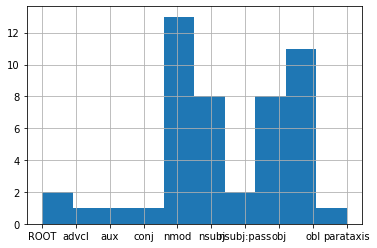

In [32]:
word_df[word_df['gold_sense_id'] == '1']['dep'].hist()

<AxesSubplot:>

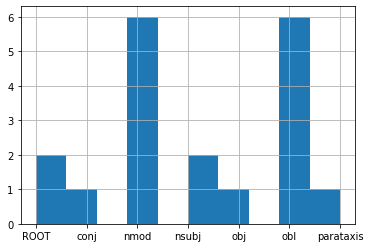

In [34]:
word_df[word_df['gold_sense_id'] == '2']['dep'].hist()